In [1]:
from glob import glob
from astroquery.mast import Mast, Observations
import os
import shutil
import numpy as np
import json
import requests
import asdf
from astropy import log
from astropy import wcs
from astropy.io import ascii, fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm
from astropy.visualization import ImageNormalize, ManualInterval, LogStretch, LinearStretch
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import extract_array

import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table

from align_to_catalogs import *
import astropy.units as u

import align_to_catalogs
from jwst import assign_wcs#.util.update_fits_wcsinfo
from jwst.datamodels import ImageModel


In [2]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [3]:
os.environ["CRDS_PATH"] = "/orange/adamginsburg/jwst/brick/crds/"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [4]:
files = glob("/orange/adamginsburg/jwst/cloudc/F405N/pipeline/*destreak.fits")
files

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00001_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00002_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00001_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00003_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00002_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00003_nrcalong_destre

In [5]:
ref_image = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00001_nrcblong_destreak_copy.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00001_nrcblong_destreak_realigned_to_vvv.fits'
file = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00003_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00001_nrcblong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcblong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00002_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00001_nrcblong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcblong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00001_nrcblong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00003_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcblong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00001_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00001_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00003_nrcblong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00002_nrcalong_destreak.fits'

align_image = file.replace("_destreak.fits", "_align.fits")
shutil.copy(file, align_image)

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_align.fits'

In [6]:
ref_fits = fits.open(ref_image)
ref_data = fits.open(ref_image)['SCI',1].data

In [7]:
pixel_scale = np.sqrt(fits.getheader(align_image, ext=1)['PIXAR_A2']*u.arcsec**2)/u.pix
pixel_scale

<Quantity 0.0625953 arcsec / pix>

In [8]:
align_image

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_align.fits'

In [9]:
from jwst.tweakreg.utils import adjust_wcs

In [10]:
pixel_scale

<Quantity 0.0625953 arcsec / pix>

In [14]:
align_image

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_align.fits'

2023-12-05 13:01:40,762 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:807: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-25T04:58:28.778' from MJD-BEG.
Set DATE-AVG to '2023-04-25T04:58:55.620' from MJD-AVG.
Set DATE-END to '2023-04-25T04:59:22.462' from MJD-END'.
  warnings.warn(

2023-12-05 13:01:40,764 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:807: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to  -119.982494 from OBSGEO-[XYZ].
Set OBSGEO-B to   -11.510718 from OBSGEO-[XYZ].
Set OBSGEO-H to 1386405788.205 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-12-05 13:01:40,775 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:807: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-25T04:58:28.778' from MJD-BEG.
Set DATE-AVG to '2023-04-25T04:58:55.620' from MJD-AVG.
Set DATE-END to '2023-04-25T04:59:22.462' from MJD-END'.
  

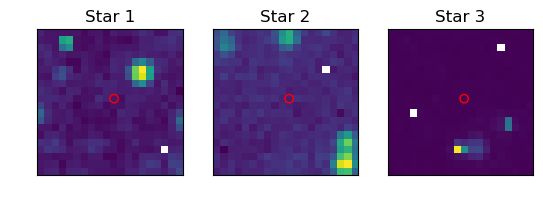

In [15]:
#01_08201_00002_nrcbl
#star_location = SkyCoord('17:46:15.2083797761','-28:38:06.0376993433',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:20.7437062304','-28:36:47.6472525487',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:22.0306124391','-28:37:54.1817578554',unit=(u.hourangle,u.deg))

#02002_02201_00003_nrcbl
#star_location = SkyCoord('17:46:17.9811789936','-28:35:42.3738317224',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:20.7437062304','-28:36:47.6472525487',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:23.4161884422','-28:35:22.1868251239',unit=(u.hourangle,u.deg))

#02002_08201_00001_nrcbl
#star_location = SkyCoord('17:46:18.8535027647','-28:34:38.7076845587',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:18.5876737284','-28:35:28.8406921089',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:24.2418605136','-28:35:08.1008023292',unit=(u.hourangle,u.deg))

##1002001_02201_00003_nrcblo
#star_location = SkyCoord('17:46:15.2083797761','-28:38:06.0376993433',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:18.3002105976','-28:39:03.6362699361',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:22.0306124391','-28:37:54.1817578554',unit=(u.hourangle,u.deg))

# 2_08201_nrca
#star_location = SkyCoord('17:46:20.4386265585','-28:31:33.2097415319',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:21.5464835067','-28:32:59.3212374597',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:27.1877425198','-28:32:50.1176777319',unit=(u.hourangle,u.deg))

#1_08201_nrca
#star_location = SkyCoord('17:46:17.4755800183','-28:33:29.4346915100',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:18.1359630965','-28:33:40.6677512987',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:25.3210055439','-28:34:05.7468224431',unit=(u.hourangle,u.deg))

#002_02201_00004_nrcal
#star_location = SkyCoord('17:46:24.0150084345','-28:32:40.8226642774',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:18.1361450710','-28:33:40.6695075082',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:23.7190259189','-28:34:01.0263844970',unit=(u.hourangle,u.deg))

#2001_02201_00004_nrcal
#star_location = SkyCoord('17:46:18.3588098638','-28:36:07.7030895747',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:22.4969954193','-28:35:05.0118468859',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:18.8536627456','-28:34:38.7115616933',unit=(u.hourangle,u.deg))

#nrca
star_location = SkyCoord('17:46:18.3588098638','-28:36:07.7030895747',unit=(u.hourangle,u.deg))
star_location2 = SkyCoord('17:46:22.4969954193','-28:35:05.0118468859',unit=(u.hourangle,u.deg))
star_location3 = SkyCoord('17:46:18.8536627456','-28:34:38.7115616933',unit=(u.hourangle,u.deg))

shutil.copy(file, align_image)
#align_image = imfile#glob.glob('mastDownload/JWST/*long*/*cal.fits')[0]
xshift = 7.9*u.arcsec
yshift = -0.3*u.arcsec

#align_fits = fits.open(align_image)
#align_fits_wcs = wcs.WCS(fits.getheader(align_image, ext=1))
#align_fits['SCI',1].header['CRPIX1']+=(xshift/pixel_scale).value#(4*u.arcsec/pixel_scale).value#
#align_fits['SCI',1].header['CRPIX2']+=(yshift/pixel_scale).value#(1*u.arcsec/pixel_scale).value#
#align_fits.writeto(align_image,overwrite=True)

align_fits = ImageModel(align_image)
align_fits.meta.wcs = adjust_wcs(align_fits.meta.wcs, delta_ra = -yshift, delta_dec = -xshift)
align_fits.save(align_image)

align_fits = fits.open(align_image)

align_data = fits.open(align_image)['SCI',1].data
align_y,align_x = skycoord_to_pixel(star_location,wcs.WCS(align_fits['SCI',1],align_fits))

align_y2,align_x2 = skycoord_to_pixel(star_location2,wcs.WCS(align_fits['SCI',1],align_fits))

align_y3,align_x3 = skycoord_to_pixel(star_location3,wcs.WCS(align_fits['SCI',1],align_fits))


ref_y,ref_x = skycoord_to_pixel(star_location,wcs.WCS(ref_fits['SCI',1],ref_fits))
align_y,align_x = skycoord_to_pixel(star_location,wcs.WCS(align_fits['SCI',1],align_fits))

cutout_size=20.

align_cutout = extract_array(align_data,(cutout_size,cutout_size),(align_x,align_y))
norm1 = simple_norm(np.nan_to_num(align_cutout), stretch='log', max_percent=99.95, log_a=1)#simple_norm(align_cutout,stretch='linear',min_cut=-.5,max_cut=3)

align_cutout2 = extract_array(align_data,(cutout_size,cutout_size),(align_x2,align_y2))
norm2 = simple_norm(np.nan_to_num(align_cutout2), stretch='log', max_percent=99.95, log_a=1)

align_cutout3 = extract_array(align_data,(cutout_size,cutout_size),(align_x3,align_y3))
norm3 = simple_norm(np.nan_to_num(align_cutout3), stretch='log', max_percent=99.95, log_a=1)

fig,axes = plt.subplots(1,3)
axes[0].imshow(align_cutout, origin='lower',
                      norm=norm1)
axes[0].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[0].set_title('Star 1')
axes[0].tick_params(labelcolor='none',axis='both',color='none')

axes[1].imshow(align_cutout2, origin='lower',
                      norm=norm2)
axes[1].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[1].set_title('Star 2')
axes[1].tick_params(labelcolor='none',axis='both',color='none')

axes[2].imshow(align_cutout3, origin='lower',
                      norm=norm3)
axes[2].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[2].set_title('Star 3')
axes[2].tick_params(labelcolor='none',axis='both',color='none')

plt.show()


In [ ]:
#.to_pandas()#.columns#[0]['Test'].split("'")[0]
#offsets_tbl.columns

In [ ]:
#align_member = member['expname'].split('.')[0]+'_align.fits'
#shutil.copy(member['expname'], align_member)

In [ ]:
offsets_tbl[offsets_tbl['Filename_1']=='jw02221002001_08201_00004_nrcblong_destreak.fits']['Filename_1']

In [ ]:
offsets_tbl[offsets_tbl['Filename_1']=='jw02221002001_08201_00004_nrcblong_destreak.fits']['xshift (arcsec)']

In [ ]:
file = 'jw02221002001_08201_00004_nrcblong_destreak.fits'

file.replace("_destreak.fits", "_align.fits")

In [ ]:
member = glob("/orange/adamginsburg/jwst/cloudc/F405N/pipeline/*destreak.fits")
offsets_tbl = Table.read('/orange/adamginsburg/jwst/cloudc/offsets/Offsets_JWST_Cloud_C.csv')
offsets_tbl

In [ ]:
offsets_tbl[m == offsets_tbl['Filename_1']]

In [ ]:
for m in member: 
    row = offsets_tbl[m.split('/')[-1] == offsets_tbl['Filename_1']]
    print(row['Filename_1'])

In [ ]:

#align_image = member.replace("_destreak.fits", "_align.fits")#.split('.')[0]+'_align.fits'
#shutil.copy(member, align_image)
#
#row = offsets_tbl[member in offsets_tbl['Filename_1']]
#align_fits = fits.open(align_image)
#pixel_scale = np.sqrt(fits.getheader(align_image, ext=1)['PIXAR_A2']*u.arcsec**2)
#align_fits['SCI',1].header['CRPIX1']+=(row['xshift (arcsec)']*u.arcsec/pixel_scale).value
#align_fits['SCI',1].header['CRPIX2']+=(row['yshift (arcsec)']*u.arcsec/pixel_scale).value
#align_fits.writeto(align_image, overwrite=True)
#member = align_image